In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/OnlineRetail - OnlineRetail.csv')

In [ ]:
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 08:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 08:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 08:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 08:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 08:34,1.69,13047.0,United Kingdom


In [38]:
display(f"Mean UnitPrice: {data['UnitPrice'].mean():.2f}")
display(f"Standard Deviation of UnitPrice: {data['UnitPrice'].std():.2f}")
display(f"Minimum UnitPrice: {data['UnitPrice'].min():.2f}")
display(f"Maximum UnitPrice: {data['UnitPrice'].max():.2f}")

'Mean UnitPrice: 4.62'

'Standard Deviation of UnitPrice: 96.76'

'Minimum UnitPrice: -11062.06'

'Maximum UnitPrice: 38970.00'

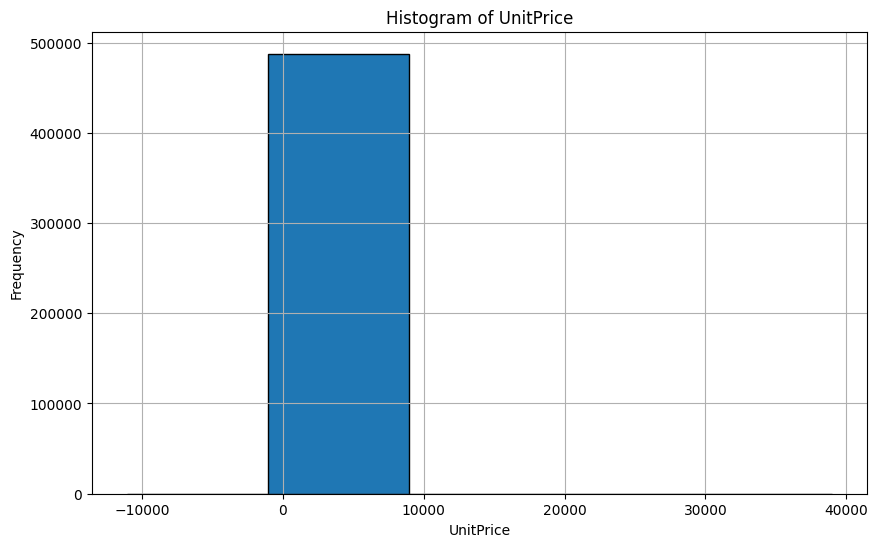

In [37]:
plt.figure(figsize=(10, 6))
plt.hist(data['UnitPrice'], bins=5, edgecolor='black')
plt.title('Histogram of UnitPrice')
plt.xlabel('UnitPrice')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
mean_price_by_country = data.groupby('Country')['UnitPrice'].mean()
sorted_mean_price_by_country = mean_price_by_country.sort_values(ascending=True)

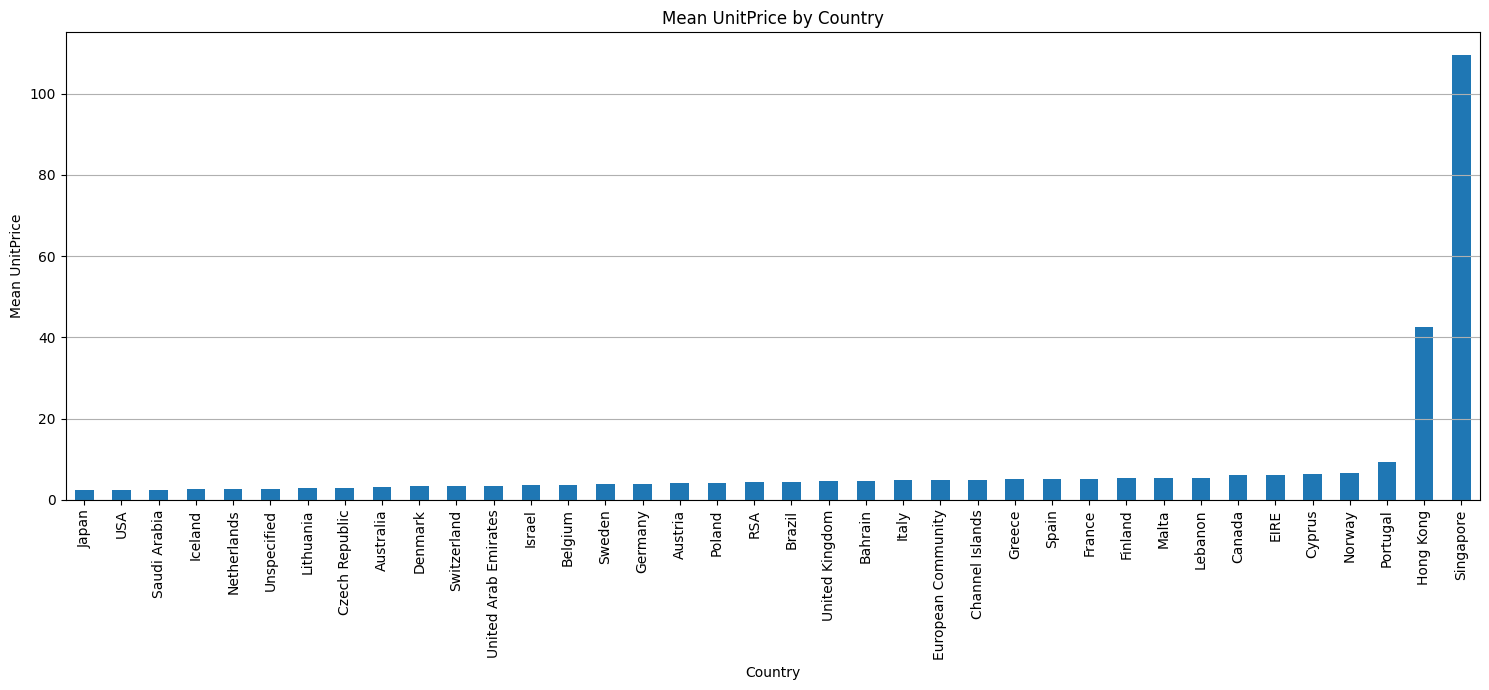

In [ ]:
plt.figure(figsize=(15, 7))
sorted_mean_price_by_country.plot(kind='bar')
plt.title('Mean UnitPrice by Country')
plt.xlabel('Country')
plt.ylabel('Mean UnitPrice')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [36]:
min_max_price_by_customer = data.groupby('CustomerID')['UnitPrice'].agg(['min', 'max'])
display(min_max_price_by_customer)

,min,max
CustomerID,,
167.0,3.75,3.75
12346.0,1.04,1.04
12347.0,0.25,12.75
12348.0,0.29,40.00
12349.0,0.42,300.00
...,...,...
18280.0,2.55,9.95
18281.0,0.42,16.95
18282.0,0.29,12.75


In [30]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['MonthYear'] = data['InvoiceDate'].dt.to_period('M')
data['Sales'] = data['Quantity'] * data['UnitPrice']
monthly_sales = data.groupby('MonthYear')['Sales'].sum().reset_index()

In [31]:
monthly_sales['CumulativeMonthlySales'] = monthly_sales['Sales'].cumsum()
display(monthly_sales)

,MonthYear,Sales,CumulativeMonthlySales
0,2010-12,748957.020,748957.020
1,2011-01,560000.260,1308957.280
2,2011-02,498062.650,1807019.930
3,2011-03,683267.080,2490287.010
4,2011-04,493207.121,2983494.131
5,2011-05,723333.510,3706827.641
6,2011-06,691123.120,4397950.761
7,2011-07,681300.111,5079250.872
8,2011-08,682680.510,5761931.382
9,2011-09,1019687.622,6781619.004


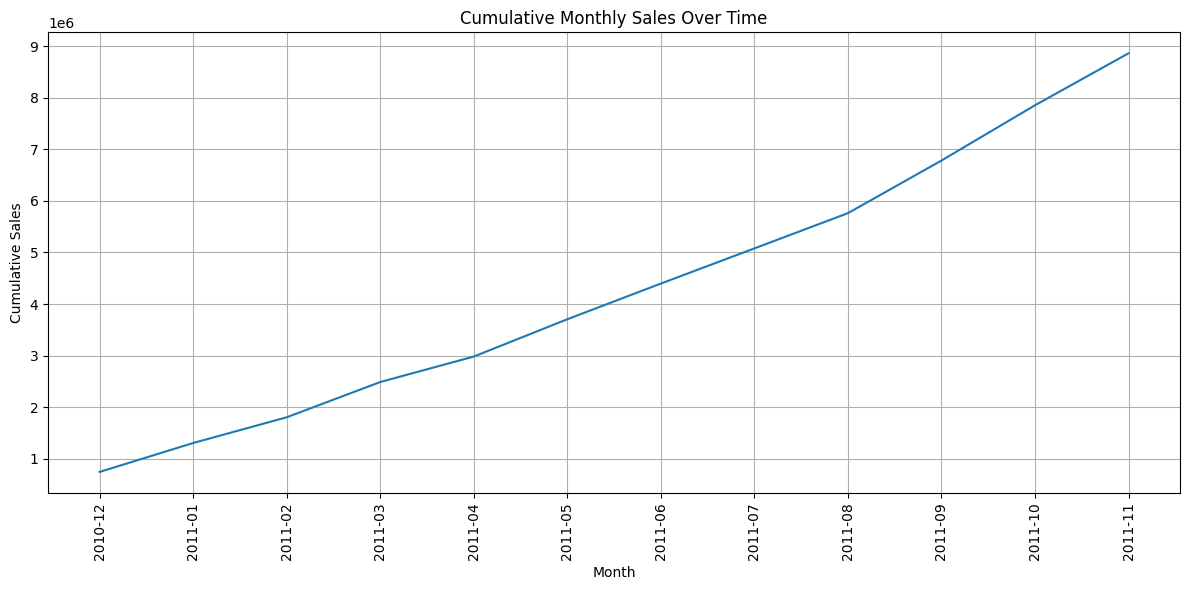

In [32]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['MonthYear'].astype(str), monthly_sales['CumulativeMonthlySales'])
plt.title('Cumulative Monthly Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Cumulative Sales')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

In [33]:
data['Year'] = data['InvoiceDate'].dt.year
yearly_sales = data.groupby('Year')['Sales'].sum().reset_index()
display(yearly_sales)

,Year,Sales
0,2010,748957.020
1,2011,8110749.214


In [34]:
yearly_sales['CumulativeYearlySales'] = yearly_sales['Sales'].cumsum()
display(yearly_sales)

,Year,Sales,CumulativeYearlySales
0,2010,748957.020,748957.020
1,2011,8110749.214,8859706.234


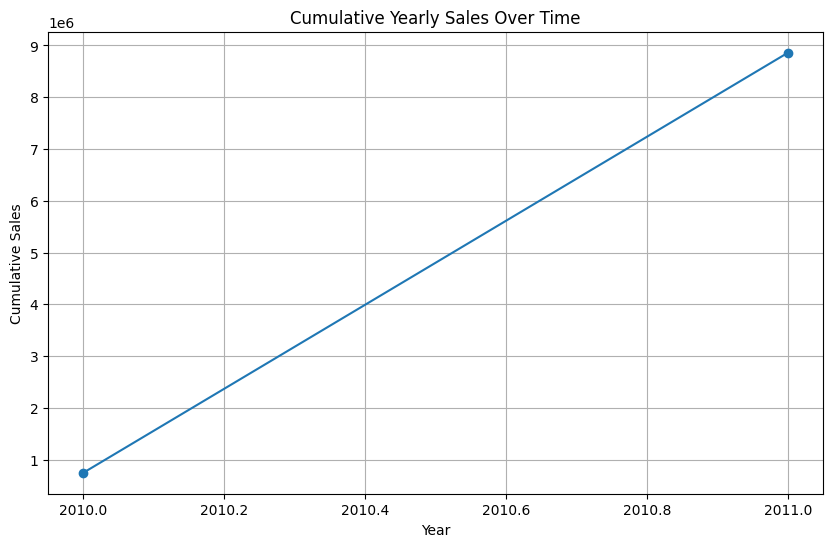

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(yearly_sales['Year'], yearly_sales['CumulativeYearlySales'], marker='o')
plt.title('Cumulative Yearly Sales Over Time')
plt.xlabel('Year')
plt.ylabel('Cumulative Sales')
plt.grid(True)
plt.show()